# SQL

In [32]:
# importing the libraries
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want out plots to apear inside the notebook 
%matplotlib inline 

In [33]:
# Import CSV into DataFrame
path = 'KCPD_Crime_Data_2021.csv'
dtypes = {
    'Beat': 'int',
    'Zip Code': 'int',
    'Area': 'string',
    'DVFlag': 'bool',
    'Firearm Used Flag': 'bool',
    'Description': 'string'
}

# Read the CSV file and select only the desired columns
columns_to_keep = ['Beat', 'Zip Code', 'Area', 'DVFlag', 'Firearm Used Flag', 'Description']
raw_df = pd.read_csv(path)
raw_df.head()

,Description,Beat,Zip Code,Area,DVFlag,Firearm Used Flag
0,Murder,332,64128,EPD,False,True
1,Theft From Building,234,64114,MPD,False,False
2,Aggravated Assault,631,64116,SCP,False,True
3,NaN,113,64105,CPD,False,False
4,Motor Vehicle Theft,211,64130,MPD,False,False


In [ ]:
#create database for table import 
import psycopg2
import json
#change database creds to postgres db
with open('create_database_creds.json') as O:
    config = json.load(O)
username = config['user']
password = config['password']
db_host = config['host']
db_port = config['port']
db_ = 'crime_data_db'
conn = psycopg2.connect(
    host=db_host,
    port=db_port,
    user=username,
    password=password,
)
conn.autocommit = True
cursor = conn.cursor()
#create database to house table
cursor.execute(f"CREATE DATABASE {db_}")
cursor.close()
conn.close()

In [ ]:

from sqlalchemy import create_engine
#upload dataframe into postgres
# Replace these values with your PostgreSQL database credentials
db_username = config['user']
db_password = config['password']
db_host = config['host']
db_port = config['port']
db_name = 'crime_data_db'

#open engine
connection_path = f"postgresql://{db_username}:{db_password}@{db_host}:{db_port}/{db_name}"
engine = create_engine(connection_path)

table_name = 'crime_data'
#import data into db
raw_df.to_sql(table_name, engine, if_exists='replace', index=False)
raw_df


### CLEANING and EDA

In [34]:
df = raw_df.dropna()
df = df[df['Area'] != 'OSPD']
df

,Description,Beat,Zip Code,Area,DVFlag,Firearm Used Flag
0,Murder,332,64128,EPD,False,True
1,Theft From Building,234,64114,MPD,False,False
2,Aggravated Assault,631,64116,SCP,False,True
4,Motor Vehicle Theft,211,64130,MPD,False,False
5,Aggravated Assault,222,64130,MPD,False,False
...,...,...,...,...,...,...
92121,Aggravated Assault,143,64110,CPD,True,False
92122,Theft of Vehicle Parts and Accessories,123,64108,CPD,False,False
92123,Aggravated Assault,115,64108,CPD,False,False
92124,Shoplifting,345,64133,EPD,False,False


In [35]:
substring = '/'
filter = df['Description'].str.contains(substring)
df = df[~filter]
df

,Description,Beat,Zip Code,Area,DVFlag,Firearm Used Flag
0,Murder,332,64128,EPD,False,True
1,Theft From Building,234,64114,MPD,False,False
2,Aggravated Assault,631,64116,SCP,False,True
4,Motor Vehicle Theft,211,64130,MPD,False,False
5,Aggravated Assault,222,64130,MPD,False,False
...,...,...,...,...,...,...
92121,Aggravated Assault,143,64110,CPD,True,False
92122,Theft of Vehicle Parts and Accessories,123,64108,CPD,False,False
92123,Aggravated Assault,115,64108,CPD,False,False
92124,Shoplifting,345,64133,EPD,False,False


In [36]:
df

,Description,Beat,Zip Code,Area,DVFlag,Firearm Used Flag
0,Murder,332,64128,EPD,False,True
1,Theft From Building,234,64114,MPD,False,False
2,Aggravated Assault,631,64116,SCP,False,True
4,Motor Vehicle Theft,211,64130,MPD,False,False
5,Aggravated Assault,222,64130,MPD,False,False
...,...,...,...,...,...,...
92121,Aggravated Assault,143,64110,CPD,True,False
92122,Theft of Vehicle Parts and Accessories,123,64108,CPD,False,False
92123,Aggravated Assault,115,64108,CPD,False,False
92124,Shoplifting,345,64133,EPD,False,False


In [37]:
# Turning DVFlag and Firearm Used Flag into 1 and 0 

df[["DVFlag", "Firearm Used Flag"]] = df[["DVFlag", "Firearm Used Flag"]].applymap(lambda x: 1 if x == True else 0)
df.head()

/var/folders/cg/s6p6vc1d3hg1gs1nhcf0cyym0000gn/T/ipykernel_929/2533950045.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["DVFlag", "Firearm Used Flag"]] = df[["DVFlag", "Firearm Used Flag"]].applymap(lambda x: 1 if x == True else 0)


,Description,Beat,Zip Code,Area,DVFlag,Firearm Used Flag
0,Murder,332,64128,EPD,0,1
1,Theft From Building,234,64114,MPD,0,0
2,Aggravated Assault,631,64116,SCP,0,1
4,Motor Vehicle Theft,211,64130,MPD,0,0
5,Aggravated Assault,222,64130,MPD,0,0


In [40]:
import pandas as pd

# Assuming df is your DataFrame
df["Zip Code"] = df["Zip Code"].astype(int)

# Check the data types after conversion
print(df.dtypes)


Description          object
Beat                 object
Zip Code              int64
Area                 object
DVFlag                int64
Firearm Used Flag     int64
dtype: object


/var/folders/cg/s6p6vc1d3hg1gs1nhcf0cyym0000gn/T/ipykernel_929/3652048394.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Zip Code"] = df["Zip Code"].astype(int)


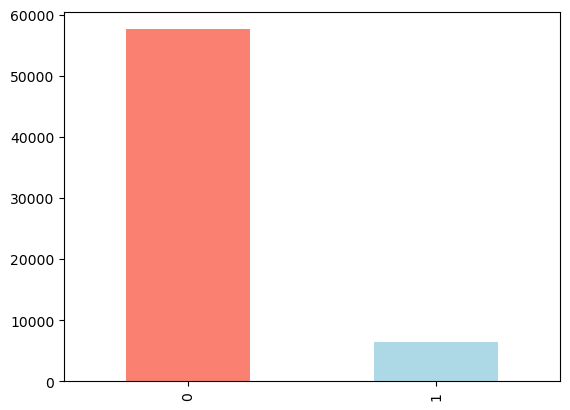

In [43]:
# Ploting to understand the variable 
df["DVFlag"].value_counts().plot(kind = "bar", color = ["salmon", "lightblue"]);

In [44]:
# are there any missing values
df.isna().sum()

Description          0
Beat                 0
Zip Code             0
Area                 0
DVFlag               0
Firearm Used Flag    0
dtype: int64

In [46]:
df.describe()

,Zip Code,DVFlag,Firearm Used Flag
count,64093.000000,64093.000000,64093.000000
mean,64103.345295,0.101337,0.113819
std,1118.779994,0.301777,0.317594
min,6106.000000,0.000000,0.000000
25%,64112.000000,0.000000,0.000000
50%,64127.000000,0.000000,0.000000
75%,64132.000000,0.000000,0.000000
max,66126.000000,1.000000,1.000000


In [47]:
df["Firearm Used Flag"].value_counts()

0    56798
1     7295
Name: Firearm Used Flag, dtype: int64

In [48]:
# Compare DVFlag with Firearm used 
pd.crosstab(df.DVFlag, df["Firearm Used Flag"])

Firearm Used Flag,0,1
DVFlag,,
0,50913,6685
1,5885,610


In [ ]:
# Create a plot of crosstab
pd.crosstab(df.DVFlag, df["Firearm Used Flag"]).plot(kind = "bar",
                                                    figsize = (10,6)
                                                    )
plt.title("Domestic Violence Frequency for the Fire arm used ")
plt.xlabel("0 = Not DV , 1 = DV")
plt.ylabel("Amount")
plt.legend(["Fire Arm", ""]);
plt.xticks(rotation = 0)

# PREPROCESSING

In [146]:
ohe_crime = pd.get_dummies(df[['Description','Area']])
ohe_crime

,Description_Aggravated Assault,Description_All Other Larceny,Description_All Other Offenses,Description_Animal Cruelty,Description_Arson,Description_Assisting or Promoting Prostitution,Description_Bad Checks,Description_Commercial Sex Acts,Description_DV Related Suicide,Description_Disorderly Conduct,...,Description_Trespass of Real Property,Description_Weapon Law Violations,Description_Welfare Fraud,Description_Wire Fraud,Area_CPD,Area_EPD,Area_MPD,Area_NPD,Area_SCP,Area_SPD
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92121,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
92122,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
92123,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
92124,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [152]:
X = df[['Description','Beat','Zip Code','Area', 'DVFlag','Firearm Used Flag']]
X

,Description,Beat,Zip Code,Area,DVFlag,Firearm Used Flag
0,Murder,332,64128,EPD,False,True
1,Theft From Building,234,64114,MPD,False,False
2,Aggravated Assault,631,64116,SCP,False,True
4,Motor Vehicle Theft,211,64130,MPD,False,False
5,Aggravated Assault,222,64130,MPD,False,False
...,...,...,...,...,...,...
92121,Aggravated Assault,143,64110,CPD,True,False
92122,Theft of Vehicle Parts and Accessories,123,64108,CPD,False,False
92123,Aggravated Assault,115,64108,CPD,False,False
92124,Shoplifting,345,64133,EPD,False,False


In [153]:
X = pd.concat([X[['Beat', 'Zip Code', 'DVFlag', 'Firearm Used Flag']], ohe_crime], axis=1)
X

,Beat,Zip Code,DVFlag,Firearm Used Flag,Description_Aggravated Assault,Description_All Other Larceny,Description_All Other Offenses,Description_Animal Cruelty,Description_Arson,Description_Assisting or Promoting Prostitution,...,Description_Trespass of Real Property,Description_Weapon Law Violations,Description_Welfare Fraud,Description_Wire Fraud,Area_CPD,Area_EPD,Area_MPD,Area_NPD,Area_SCP,Area_SPD
0,332,64128,False,True,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,234,64114,False,False,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,631,64116,False,True,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,211,64130,False,False,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,222,64130,False,False,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92121,143,64110,True,False,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
92122,123,64108,False,False,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
92123,115,64108,False,False,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
92124,345,64133,False,False,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [155]:
y = df['Description']
y.unique()

array(['Murder', 'Theft From Building', 'Aggravated Assault',
       'Motor Vehicle Theft', 'Simple Assault', 'Identity Theft',
       'Robbery', 'Shoplifting', 'Prostitution',
       'Theft From Motor Vehicle', 'Embezzlement', 'Disorderly Conduct',
       'Forcible Sodomy', 'All Other Larceny',
       'Trespass of Real Property', 'Intimidation',
       'Family Offenses, Nonviolent', 'Forcible Rape', 'Arson',
       'Forcible Fondling', 'All Other Offenses',
       'Driving Under the Influence', 'Stolen Property Offenses',
       'Weapon Law Violations', 'Wire Fraud', 'Drug Equipment Violations',
       'Theft of Vehicle Parts and Accessories', 'Statutory Rape',
       'Bad Checks', 'Impersonation',
       'Assisting or Promoting Prostitution', 'Incest',
       'Theft From Coin-Operated Machine', 'Purse-Snatching',
       'Liquor Law Violations', 'Pocket-Picking', 'Animal Cruelty',
       'Commercial Sex Acts', 'Welfare Fraud', 'Purchasing Prostitution',
       'Drunkenness', 'DV Relat

In [156]:
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (64093, 55)
y shape: (64093,)


In [157]:
#Machine Learning

In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [159]:
X_train['Zip Code'].value_counts()

64111    3741
64130    3361
64127    2759
64133    2758
64132    2373
         ... 
64135       1
64103       1
50023       1
64122       1
66126       1
Name: Zip Code, Length: 78, dtype: int64

In [160]:
X_train.shape

(51274, 55)

In [161]:
y_train

6877           All Other Offenses
45050                      Murder
34694         Theft From Building
65139              Simple Assault
78704          Aggravated Assault
                   ...           
65557                     Robbery
74961              Simple Assault
60879    Theft From Motor Vehicle
62252           All Other Larceny
3999     Theft From Motor Vehicle
Name: Description, Length: 51274, dtype: object

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB

from sklearn.naive_bayes import CategoricalNB
clf = CategoricalNB(force_alpha=True)
clf.fit(X_train, y_train)

CategoricalNB(force_alpha=True)

In [172]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)


y_pred = clf.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print(classification_report(y_test, y_pred))
print("Accuracy:", accuray)
print("F1 Score:", f1)

/Users/brettsquires/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                        precision    recall  f1-score   support

                    Aggravated Assault       1.00      1.00      1.00      1641
                     All Other Larceny       1.00      1.00      1.00       662
                    All Other Offenses       1.00      1.00      1.00       648
                                 Arson       0.98      1.00      0.99        45
   Assisting or Promoting Prostitution       0.00      0.00      0.00         1
                    Disorderly Conduct       1.00      1.00      1.00       220
           Driving Under the Influence       0.99      1.00      1.00       212
             Drug Equipment Violations       1.00      1.00      1.00        57
                          Embezzlement       1.00      1.00      1.00        45
           Family Offenses, Nonviolent       1.00      1.00      1.00        85
                     Forcible Fondling       1.00      1.00      1.00        42
                         Forcible Rape 

/Users/brettsquires/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/brettsquires/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [164]:
X_test.iloc[100].values

array(['545', '64134', False, False, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=object)

In [165]:
clf.predict([['332', '64128', 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]])

/Users/brettsquires/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(


array(['Aggravated Assault'], dtype='<U38')

In [173]:
y_test.iloc[99]

'All Other Offenses'

In [175]:
from joblib import dump
dump(clf, 'crime_prediction.joblib') 

['crime_prediction.joblib']